In [161]:
#lunguagem natural
import nltk
from nltk.corpus import stopwords

#Biblioteca para vetorização do texto
from sklearn.feature_extraction.text import CountVectorizer

#auxilar para contar as palavras convertidas em vetor
from sklearn.feature_extraction.text import TfidfTransformer

#fit do modelo
from sklearn.naive_bayes import MultinomialNB

#treinar modelo
from sklearn.model_selection import train_test_split

#Criando rotina de trabalho
from sklearn.pipeline import Pipeline

#relatorio e metricas
from sklearn.metrics import classification_report

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
nltk.download()

#baixar a biblioteca STOPWORDS
#caminho: Corpora / stopwords -> download

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
#download da base de dddos foi feito do site: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

#base de dados                                #arquivo da base de dados
messages = [line.rstrip() for line in open('.\\UCI-MachineLearning-BaseDeDados\\SMSSpamCollection')]

In [7]:
#essa base de dados é uma lista

print(len(messages))

5574


In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [13]:
#construino um for para ver algumas mensagens

for numeroDeMensagens, escrevaMensagem in enumerate(messages[:5]):
    print(numeroDeMensagens, escrevaMensagem)


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though


In [22]:
#transformar essa lista em um DataFrame

dfMensagens = pd.read_csv('.\\UCI-MachineLearning-BaseDeDados\\SMSSpamCollection', sep='\t', names=['Marcador', 'Mensagens'])
dfMensagens.head()

,Marcador,Mensagens
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#explorando dataframe

dfMensagens.describe()

,Marcador,Mensagens
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
#explorando dataframe

dfMensagens.groupby('Marcador').describe()

Mensagens                                                            \
             count unique                                                top   
Marcador                                                                       
ham           4825   4516                             Sorry, I'll call later   
spam           747    653  Please call our customer service representativ...   

               
         freq  
Marcador       
ham        30  
spam        4

In [26]:
#Compondo o dataframe com mais informações
#adcionando coluna com o tamanho de cada mensagem

dfMensagens['Quantidade de Letras'] = dfMensagens['Mensagens'].apply(len)
dfMensagens.head()

,Marcador,Mensagens,Quantidade de Letras
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


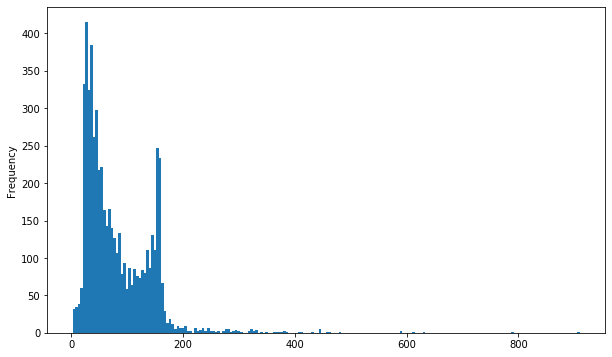

In [29]:
#Analisando as mensagens por grafico

plt.figure(figsize= (10,6))
dfMensagens['Quantidade de Letras'].plot(kind='hist', bins=200)

In [30]:
#Visualizando mensagem outliar

dfMensagens['Quantidade de Letras'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Quantidade de Letras, dtype: float64

In [36]:
#Visualizando mensagem outliar

dfMensagens[dfMensagens['Quantidade de Letras'] == 910]['Mensagens'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022505CD0BC8>,
      dtype=object)

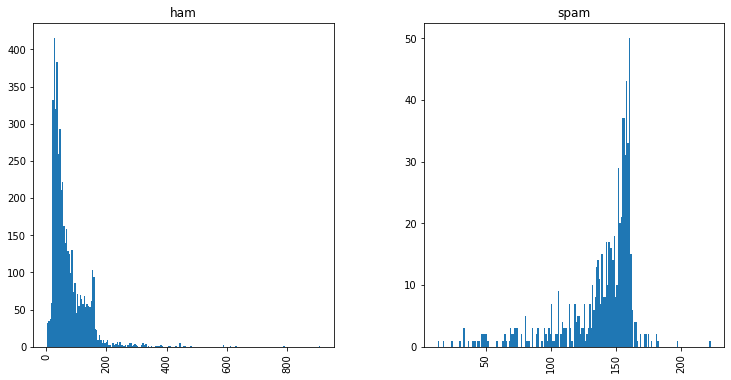

In [43]:
#Analise de grafico por Marcadores 

dfMensagens.hist(column='Quantidade de Letras', bins=200, by='Marcador', figsize= (12,6))

In [58]:
#TRATAMENTO DE TEXTO PARA MACHINE LEARNING

import string

textoSujo = "Essa, mensagem+ possui- potuação."

In [59]:
#retirando pontuação e acentos
            #para cada caracter que for lido no texto, adcionar somente o que não estiver com potuações
textoLimpo = [caracter for caracter in textoSujo if caracter not in string.punctuation]
print(textoLimpo)

['E', 's', 's', 'a', ' ', 'm', 'e', 'n', 's', 'a', 'g', 'e', 'm', ' ', 'p', 'o', 's', 's', 'u', 'i', ' ', 'p', 'o', 't', 'u', 'a', 'ç', 'ã', 'o']


In [60]:
#agrupando o texto

textoLimpo = ''.join(textoLimpo)
print(textoLimpo)

Essa mensagem possui potuação


In [71]:
#outros exemplos de join na string

alfabeto = 'A B C D E F G H I J K L M N O P Q R S T U V X W Y Z teste'.split()

print(alfabeto)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'W', 'Y', 'Z', 'teste']


In [74]:
#outros exemplos de join na string

alfabeto = '-'.join(alfabeto)
alfabeto

'A-B-C-D-E-F-G-H-I-J-K-L-M-N-O-P-Q-R-S-T-U-V-X-W-Y-Z-t-e-s-t-e'

In [77]:
#Començando a programação de linguagem natural
#from nltk.corpus import stopwords
#biblioteca já foi importada acima

#explorando biblioteca
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
#explorando biblioteca

stopwords.words('Portuguese')

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [81]:
#retirando stopwords da mensagem

textoSujo = 'Isso é uma mensagem simples, que tem pontuação.'

textoLimpo = [caracter for caracter in textoSujo.split() if caracter.lower() not in stopwords.words('Portuguese')]
textoLimpo

['mensagem', 'simples,', 'pontuação.']

In [83]:
textoSujo = 'It is a simple message, It has puntuation.'

textoLimpo = [caracter for caracter in textoSujo.split() if caracter.lower() not in stopwords.words('English')]
textoLimpo

['simple', 'message,', 'puntuation.']

In [86]:
#Função para processamento de texto

def LimpaTexto(mensagem):
    #retira pontuação
    semPontuacao = [caracter for caracter in mensagem if caracter not in string.punctuation]
    
    #string punctuation separa as letras, então será preciso junta-las novamente
    semPontuacao = ''.join(semPontuacao)
    
    #retira Stopwords                        #variavel acima
    textoLimpo = [caracter for caracter in semPontuacao.split() if caracter.lower() not in stopwords.words('English')]
    
    return textoLimpo

In [87]:
#TRATAMENTO DE TEXTO NO DATAFRAME

dfMensagens['Texto Limpo'] = dfMensagens['Mensagens'].apply(LimpaTexto)
dfMensagens.head()

,Marcador,Mensagens,Quantidade de Letras,Texto Limpo
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


In [93]:
#Vetorizando o texto

conversorDePalavras = CountVectorizer(analyzer = LimpaTexto).fit(dfMensagens['Mensagens'])


In [95]:
print(len(conversorDePalavras.vocabulary_))

11425


In [120]:
#retirando mensagem do dataframe e atribuindo a variavel

mensagemLinha4 = dfMensagens['Mensagens'][4]

In [121]:
#Mensagem da linha 4 transformada em vetor 

vertorMensagem4 = conversorDePalavras.transform([mensagemLinha4])

In [124]:
print(vertorMensagem4)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [123]:
#acessando palavra no vetor 

print(conversorDePalavras.get_feature_names()[2948])

Nah


In [125]:
#Convertendo todas as mensagens em um vetor

vetorMensagens = conversorDePalavras.transform(dfMensagens['Mensagens'])

In [129]:
print(vetorMensagens.shape)

(5572, 11425)


In [132]:
#Criando Objeto do bibliotecad do sklearn
#auxilar para contar palavras transformadas em vetores

contadorDePalavras = TfidfTransformer()


In [133]:
#auxilar para contar palavras transformadas em vetores

contadorDePalavras = contadorDePalavras.fit(vetorMensagens)

In [135]:
contadorSMS4 = contadorDePalavras.transform(vertorMensagem4)
print(contadorSMS4)

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [139]:
#Qual a representação numerica da palavra university?

print(contadorDePalavras.idf_[conversorDePalavras.vocabulary_['university']])

8.527076498901426


In [142]:
#fit do modelo

tfidfMensagens = contadorDePalavras.transform(vetorMensagens)

#criando objeto
spamDetectModel = MultinomialNB()

spamDetectModel.fit(tfidfMensagens, dfMensagens['Marcador'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [144]:
#treinando modelo para predizer palavras

print('Palavra Esperada:', dfMensagens['Marcador'][3])
print('Palavra Prevista:', spamDetectModel.predict(contadorSMS4[0]))

Palavra Esperada: ham
Palavra Prevista: ['ham']


In [148]:
#TREINANDO TODO O MODELO

msgTrain, msgTest, marcadorTrain, marcadorTest = train_test_split(dfMensagens['Mensagens'], 
                                                                  dfMensagens['Marcador'], 
                                                                  test_size= 0.3)

In [151]:
msgTrain

1421            No. She's currently in scotland for that.
4374                              Me fine..absolutly fine
3029            You have got tallent but you are wasting.
381     I guess that's why you re worried. You must kn...
2414    Lol please do. Actually send a pic of yourself...
                              ...                        
1373    1) Go to write msg 2) Put on Dictionary mode 3...
4137                   have you ever had one foot before?
1310              Ok, be careful ! Don't text and drive !
1004        &lt;#&gt;  am I think? Should say on syllabus
2725                                  Nope... C ü then...
Name: Mensagens, Length: 3900, dtype: object

In [156]:
#Criando rotina de tralhao para excução de vários codigos

rotinaDeTrabalho = Pipeline([
    ('bow:', CountVectorizer(analyzer = LimpaTexto)),
    ('tfidf:',  TfidfTransformer()),
    ('classifier:', MultinomialNB()),
])

In [157]:
#fit do modelo usando a rotina de tralho pipeline

rotinaDeTrabalho.fit(msgTrain, marcadorTrain)

Pipeline(memory=None,
         steps=[('bow:',
                 CountVectorizer(analyzer=<function LimpaTexto at 0x0000022509C60A68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf:',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier:',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [160]:
#prevendo

previsao = rotinaDeTrabalho.predict(msgTest)

In [162]:
#relatorio

print(classification_report(previsao, marcadorTest))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1511
        spam       0.70      1.00      0.82       161

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672

